In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [2]:
df = pd.read_csv("cc_test.csv")

What's my dataset look like?

In [3]:
df.head()

,id,fkey_reference_id,company,state,gender,age,marital,premium,benefit,inflation,schedule,total_ltc,face_amount,monthly_ltc,total_ltc_80,monthly_ltc_80,timestamp
0,123440,1115,Nationwide CareMatters II,AL,Female,40,Married,60000,6 Years,3% Compound,Single Pay,307778,102593,4275,1050839.0,13538.0,9/23/2019 2:21:12 AM
1,123441,1115,Nationwide CareMatters II,AL,Female,41,Married,60000,6 Years,3% Compound,Single Pay,284222,94741,3948,942147.0,12138.0,9/23/2019 2:25:29 AM
2,123442,1115,Nationwide CareMatters II,AL,Female,42,Married,60000,6 Years,3% Compound,Single Pay,278261,92754,3865,895522.0,11537.0,9/23/2019 2:26:47 AM
3,123443,1115,Nationwide CareMatters II,AL,Female,43,Married,60000,6 Years,3% Compound,Single Pay,272546,90849,3785,851580.0,10971.0,9/23/2019 2:26:59 AM
4,123444,1115,Nationwide CareMatters II,AL,Female,44,Married,60000,6 Years,3% Compound,Single Pay,267060,89020,3709,810135.0,10437.0,9/23/2019 2:27:11 AM


What columns do I have?

In [4]:
df.dtypes

id                     int64
fkey_reference_id      int64
company               object
state                 object
gender                object
age                    int64
marital               object
premium               object
benefit               object
inflation             object
schedule              object
total_ltc              int64
face_amount            int64
monthly_ltc            int64
total_ltc_80         float64
monthly_ltc_80       float64
timestamp             object
dtype: object

In [5]:
df.describe()

,id,fkey_reference_id,age,total_ltc,face_amount,monthly_ltc,total_ltc_80,monthly_ltc_80
count,2.060000e+02,206.000000,206.000000,2.060000e+02,206.000000,206.000000,2.040000e+02,204.000000
mean,3.870492e+05,2097.402913,54.354369,3.257642e+05,107736.344660,4326.393204,6.568313e+05,8598.745098
std,3.220140e+05,590.502455,8.777224,1.733077e+05,56729.485854,2432.026267,3.418328e+05,4564.579059
min,1.234400e+05,1115.000000,40.000000,1.635220e+05,50560.000000,2107.000000,2.381830e+05,3037.000000
25%,3.033612e+05,1710.000000,46.000000,2.110430e+05,70691.000000,2719.000000,3.811680e+05,4911.000000
50%,3.686135e+05,1938.000000,56.000000,2.576990e+05,100000.000000,3574.000000,5.147675e+05,6645.500000
75%,3.858048e+05,2783.000000,60.000000,3.988272e+05,127125.500000,5296.500000,8.835865e+05,11668.750000
max,2.229683e+06,3621.000000,72.000000,1.114152e+06,371384.000000,15474.000000,1.542099e+06,19867.000000


In [6]:
objects = ['company', 'state', 'gender', 'marital', 'premium', 'benefit', 'inflation', 'schedule']

In [7]:
for item in objects:
    unique = df[item].unique()
    print(f'Column "{item}" has {len(unique)} entries: {unique}')

Column "company" has 6 entries: ['Nationwide CareMatters II' 'Lincoln MoneyGuard III'
 'Pacific Life PremierCare Choice 2019' 'Securian Financial SecureCare UL'
 'Lincoln MoneyGuard II 2020' 'State Life Asset-Care 2019 Single Pay']
Column "state" has 51 entries: ['AL' 'AK' 'AZ' 'AR' 'CA' 'CO' 'CT' 'DE' 'DC' 'FL' 'HI' 'ID' 'IL' 'IN'
 'IA' 'KS' 'KY' 'LA' 'ME' 'MD' 'MA' 'MI' 'MN' 'MS' 'MO' 'MT' 'NE' 'NV'
 'NH' 'NJ' 'NM' 'NY' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI' 'SC' 'SD' 'TN'
 'TX' 'UT' 'VT' 'VA' 'WA' 'WV' 'WI' 'WY' 'GA']
Column "gender" has 2 entries: ['Female' 'Male']
Column "marital" has 2 entries: ['Married' 'None']
Column "premium" has 8 entries: ['60000' '90000' '100000' '80000' '$130,000' '$140,000' '$50,000' '50000']
Column "benefit" has 1 entries: ['6 Years']
Column "inflation" has 3 entries: ['3% Compound' '5% Simple' 'None']
Column "schedule" has 2 entries: ['Single Pay' '10 Years']


Clean up the dataset:

* drop null rows
* drop useless columns
* clean up certain values
* encode categorical variables

1. Drop Null Rows

In [8]:
df = df[-df.isnull().any(axis=1)]

2. Drop Useless Columns

`id` and `fkey_reference_id` aren't needed for this analysis. We're also only going to work with `total_ltc` as the response variable, so the remainder columns `face_amount`, `monthly_ltc`, `total_ltc_80`, `monthly_ltc_80` and `timestamp` can go as well. The numerical remainder columns I believe can be calculated after the fact once `total_ltc` is known.

We also don't need `benefit` since this value is the same throughout the entire dataset.

In [9]:
unnecessary = ['id', 'fkey_reference_id', 'face_amount', 'monthly_ltc', 'total_ltc_80', 'monthly_ltc_80', 'timestamp', 'benefit']
df = df.drop(columns=unnecessary)

3. Clean up certain values

The `premium` column has some weird values that are formatted differently, so we'll clean them all up real quick.

In [10]:
df.loc[df['premium']=='$50,000', 'premium'] = '50000'
df.loc[df['premium']=='$130,000', 'premium'] = '130000'
df.loc[df['premium']=='$140,000', 'premium'] = '140000'

In [11]:
df = df.astype({'company': 'category',
                'state': 'category',
                'gender': 'category',
                'marital': 'category',
                'premium': 'category',
                'inflation': 'category',
                'schedule': 'category'})

In [12]:
df.dtypes

company      category
state        category
gender       category
age             int64
marital      category
premium      category
inflation    category
schedule     category
total_ltc       int64
dtype: object

In [13]:
df.head()

,company,state,gender,age,marital,premium,inflation,schedule,total_ltc
0,Nationwide CareMatters II,AL,Female,40,Married,60000,3% Compound,Single Pay,307778
1,Nationwide CareMatters II,AL,Female,41,Married,60000,3% Compound,Single Pay,284222
2,Nationwide CareMatters II,AL,Female,42,Married,60000,3% Compound,Single Pay,278261
3,Nationwide CareMatters II,AL,Female,43,Married,60000,3% Compound,Single Pay,272546
4,Nationwide CareMatters II,AL,Female,44,Married,60000,3% Compound,Single Pay,267060


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 204 entries, 0 to 205
Data columns (total 9 columns):
company      204 non-null category
state        204 non-null category
gender       204 non-null category
age          204 non-null int64
marital      204 non-null category
premium      204 non-null category
inflation    204 non-null category
schedule     204 non-null category
total_ltc    204 non-null int64
dtypes: category(7), int64(2)
memory usage: 10.0 KB


Let's try to encode our variables.

In [15]:
df_encoded = df.copy()

In [16]:
df_encoded.head()

,company,state,gender,age,marital,premium,inflation,schedule,total_ltc
0,Nationwide CareMatters II,AL,Female,40,Married,60000,3% Compound,Single Pay,307778
1,Nationwide CareMatters II,AL,Female,41,Married,60000,3% Compound,Single Pay,284222
2,Nationwide CareMatters II,AL,Female,42,Married,60000,3% Compound,Single Pay,278261
3,Nationwide CareMatters II,AL,Female,43,Married,60000,3% Compound,Single Pay,272546
4,Nationwide CareMatters II,AL,Female,44,Married,60000,3% Compound,Single Pay,267060


In [17]:
states = df['state'].unique().tolist() # Alphabetical order

In [18]:
number_states = {'state': {k: v for k, v in zip(states,list(range(1,len(states)+1)))}}

In [19]:
df_encoded.replace(number_states, inplace=True)

In [20]:
df_encoded.head()

,company,state,gender,age,marital,premium,inflation,schedule,total_ltc
0,Nationwide CareMatters II,1,Female,40,Married,60000,3% Compound,Single Pay,307778
1,Nationwide CareMatters II,1,Female,41,Married,60000,3% Compound,Single Pay,284222
2,Nationwide CareMatters II,1,Female,42,Married,60000,3% Compound,Single Pay,278261
3,Nationwide CareMatters II,1,Female,43,Married,60000,3% Compound,Single Pay,272546
4,Nationwide CareMatters II,1,Female,44,Married,60000,3% Compound,Single Pay,267060


In [21]:
df_encoded['state'].astype('category')

0       1
1       1
2       1
3       1
4       1
       ..
199    51
202     5
203     5
204     5
205     5
Name: state, Length: 204, dtype: category
Categories (51, int64): [1, 2, 3, 4, ..., 48, 49, 50, 51]

In [22]:
df_onehot = df_encoded.copy()

In [23]:
df_onehot = pd.get_dummies(df_onehot, columns=['gender', 'marital', 'schedule'])

In [24]:
df_onehot.head()

,company,state,age,premium,inflation,total_ltc,gender_Female,gender_Male,marital_Married,marital_None,schedule_10 Years,schedule_Single Pay
0,Nationwide CareMatters II,1,40,60000,3% Compound,307778,1,0,1,0,0,1
1,Nationwide CareMatters II,1,41,60000,3% Compound,284222,1,0,1,0,0,1
2,Nationwide CareMatters II,1,42,60000,3% Compound,278261,1,0,1,0,0,1
3,Nationwide CareMatters II,1,43,60000,3% Compound,272546,1,0,1,0,0,1
4,Nationwide CareMatters II,1,44,60000,3% Compound,267060,1,0,1,0,0,1


In [25]:
df_onehot.dtypes

company                category
state                     int64
age                       int64
premium                category
inflation              category
total_ltc                 int64
gender_Female             uint8
gender_Male               uint8
marital_Married           uint8
marital_None              uint8
schedule_10 Years         uint8
schedule_Single Pay       uint8
dtype: object

In [26]:
df_inflation = df_onehot.copy()

In [27]:
df_inflation['inflation'].unique().tolist()

['3% Compound', '5% Simple', 'None']

In [28]:
inflation_mapping = {'inflation': {'None': 0, '3% Compound': 1, '5% Simple': 2}}

In [29]:
labels = df_inflation['inflation'].astype('category').cat.categories.tolist()

In [30]:
replace_inflation = {'inflation': {k: v for k, v in zip(labels,list(range(1,len(labels)+1)))}}

In [31]:
df_inflation.replace(inflation_mapping, inplace=True)

In [32]:
df_inflation.head()

,company,state,age,premium,inflation,total_ltc,gender_Female,gender_Male,marital_Married,marital_None,schedule_10 Years,schedule_Single Pay
0,Nationwide CareMatters II,1,40,60000,1,307778,1,0,1,0,0,1
1,Nationwide CareMatters II,1,41,60000,1,284222,1,0,1,0,0,1
2,Nationwide CareMatters II,1,42,60000,1,278261,1,0,1,0,0,1
3,Nationwide CareMatters II,1,43,60000,1,272546,1,0,1,0,0,1
4,Nationwide CareMatters II,1,44,60000,1,267060,1,0,1,0,0,1


In [33]:
df_inflation.tail()

,company,state,age,premium,inflation,total_ltc,gender_Female,gender_Male,marital_Married,marital_None,schedule_10 Years,schedule_Single Pay
199,Nationwide CareMatters II,51,44,50000,0,380116,0,1,0,1,0,1
202,Lincoln MoneyGuard II 2020,5,40,50000,0,406431,0,1,0,1,0,1
203,Lincoln MoneyGuard II 2020,5,41,50000,0,393495,0,1,0,1,0,1
204,Lincoln MoneyGuard II 2020,5,42,50000,0,381632,0,1,0,1,0,1
205,Lincoln MoneyGuard II 2020,5,43,50000,0,370472,0,1,0,1,0,1


In [34]:
df_company = df_inflation.copy()

In [35]:
df_company = pd.get_dummies(df_company, columns=['company'])

In [36]:
df_company.head()

,state,age,premium,inflation,total_ltc,gender_Female,gender_Male,marital_Married,marital_None,schedule_10 Years,schedule_Single Pay,company_Lincoln MoneyGuard II 2020,company_Lincoln MoneyGuard III,company_Nationwide CareMatters II,company_Pacific Life PremierCare Choice 2019,company_Securian Financial SecureCare UL
0,1,40,60000,1,307778,1,0,1,0,0,1,0,0,1,0,0
1,1,41,60000,1,284222,1,0,1,0,0,1,0,0,1,0,0
2,1,42,60000,1,278261,1,0,1,0,0,1,0,0,1,0,0
3,1,43,60000,1,272546,1,0,1,0,0,1,0,0,1,0,0
4,1,44,60000,1,267060,1,0,1,0,0,1,0,0,1,0,0


In [37]:
df_company['premium'] = df_company['premium'].astype('int64')

In [38]:
df_company.dtypes

state                                           int64
age                                             int64
premium                                         int64
inflation                                       int64
total_ltc                                       int64
gender_Female                                   uint8
gender_Male                                     uint8
marital_Married                                 uint8
marital_None                                    uint8
schedule_10 Years                               uint8
schedule_Single Pay                             uint8
company_Lincoln MoneyGuard II 2020              uint8
company_Lincoln MoneyGuard III                  uint8
company_Nationwide CareMatters II               uint8
company_Pacific Life PremierCare Choice 2019    uint8
company_Securian Financial SecureCare UL        uint8
dtype: object

In [39]:
df_company.head()

,state,age,premium,inflation,total_ltc,gender_Female,gender_Male,marital_Married,marital_None,schedule_10 Years,schedule_Single Pay,company_Lincoln MoneyGuard II 2020,company_Lincoln MoneyGuard III,company_Nationwide CareMatters II,company_Pacific Life PremierCare Choice 2019,company_Securian Financial SecureCare UL
0,1,40,60000,1,307778,1,0,1,0,0,1,0,0,1,0,0
1,1,41,60000,1,284222,1,0,1,0,0,1,0,0,1,0,0
2,1,42,60000,1,278261,1,0,1,0,0,1,0,0,1,0,0
3,1,43,60000,1,272546,1,0,1,0,0,1,0,0,1,0,0
4,1,44,60000,1,267060,1,0,1,0,0,1,0,0,1,0,0


In [40]:
df = df_company.copy()

Alright, should be time for some regression analysis.

In [41]:
df.shape

(204, 16)

In [42]:
df.describe()

,state,age,premium,inflation,total_ltc,gender_Female,gender_Male,marital_Married,marital_None,schedule_10 Years,schedule_Single Pay,company_Lincoln MoneyGuard II 2020,company_Lincoln MoneyGuard III,company_Nationwide CareMatters II,company_Pacific Life PremierCare Choice 2019,company_Securian Financial SecureCare UL
count,204.000000,204.000000,204.000000,204.000000,2.040000e+02,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,34.622549,54.490196,84950.980392,1.240196,3.264704e+05,0.519608,0.480392,0.622549,0.377451,0.250000,0.750000,0.102941,0.245098,0.289216,0.323529,0.039216
std,20.778439,8.711292,19814.348909,0.592359,1.740107e+05,0.500844,0.500844,0.485942,0.485942,0.434078,0.434078,0.304630,0.431203,0.454514,0.468974,0.194585
min,1.000000,40.000000,50000.000000,0.000000,1.635220e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.750000,46.000000,80000.000000,1.000000,2.110430e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,51.000000,56.500000,90000.000000,1.000000,2.600565e+05,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,51.000000,60.000000,100000.000000,2.000000,4.014540e+05,1.000000,1.000000,1.000000,1.000000,0.250000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,51.000000,72.000000,140000.000000,2.000000,1.114152e+06,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


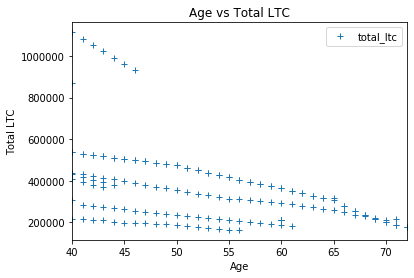

In [43]:
df.plot(x='age', y='total_ltc', style='+')  
plt.title('Age vs Total LTC')  
plt.xlabel('Age')  
plt.ylabel('Total LTC')  
plt.show()

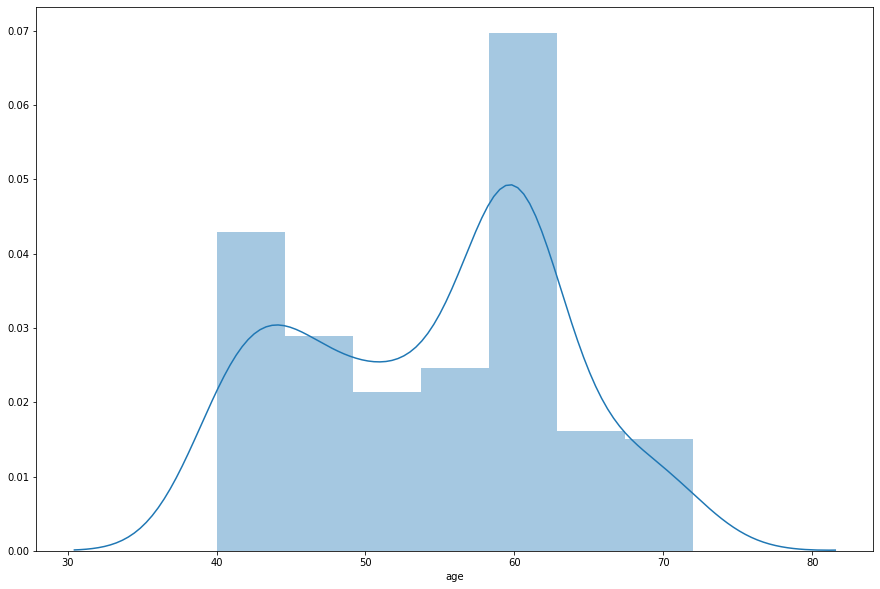

In [44]:
plt.figure(figsize=(15,10))
plt.tight_layout()
sns.distplot(df['age'])

Try with `scikit-learn`.

In [45]:
init_frame = df.copy()

In [46]:
X = init_frame.drop('total_ltc', 1)
y = init_frame['total_ltc']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [48]:
regressor = LinearRegression()

In [49]:
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [50]:
pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

,Coefficient
state,1.689767e-09
age,-9.462436e+03
premium,5.815945e+00
inflation,-1.218046e+05
gender_Female,-7.073157e+03
gender_Male,7.073157e+03
marital_Married,-6.065070e+03
marital_None,6.065070e+03
schedule_10 Years,-1.188639e+05
schedule_Single Pay,1.188639e+05


In [51]:
y_pred = regressor.predict(X_test)

In [52]:
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
18,195965,164743.196628
45,211043,211043.000000
33,211043,211043.000000
37,211043,211043.000000
109,511702,503037.324786
90,384337,370563.224322
5,261790,287754.861345
124,374406,361100.788574
12,225501,221517.811113
153,314122,323595.719042


In [53]:
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = (1 - (1 - r2) * ((X_test.shape[0] - 1) / 
          (X_test.shape[0] - X_test.shape[1] - 1)))
r2, adj_r2

(0.9677154566190588, 0.9483447305904941)

In [54]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 12781.71274671021
Mean Squared Error: 308490249.76109153
Root Mean Squared Error: 17563.89050754677


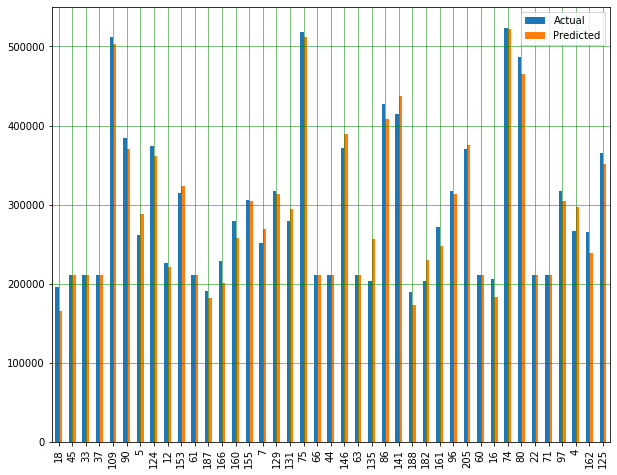

In [55]:
results.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

Try with `statsmodels`.

In [56]:
df.head()

,state,age,premium,inflation,total_ltc,gender_Female,gender_Male,marital_Married,marital_None,schedule_10 Years,schedule_Single Pay,company_Lincoln MoneyGuard II 2020,company_Lincoln MoneyGuard III,company_Nationwide CareMatters II,company_Pacific Life PremierCare Choice 2019,company_Securian Financial SecureCare UL
0,1,40,60000,1,307778,1,0,1,0,0,1,0,0,1,0,0
1,1,41,60000,1,284222,1,0,1,0,0,1,0,0,1,0,0
2,1,42,60000,1,278261,1,0,1,0,0,1,0,0,1,0,0
3,1,43,60000,1,272546,1,0,1,0,0,1,0,0,1,0,0
4,1,44,60000,1,267060,1,0,1,0,0,1,0,0,1,0,0


In [57]:
init_frame = df.copy()
X = init_frame.drop('total_ltc', 1)
y = init_frame['total_ltc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [58]:
X_train = sm.add_constant(X_train)

/home/jayascript/.virtualenvs/datasci/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [59]:
statsmodel1 = sm.OLS(y_train, X_train).fit()

In [60]:
statsmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_ltc   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     963.0
Date:                Wed, 29 Jan 2020   Prob (F-statistic):          5.25e-132
Time:                        03:59:41   Log-Likelihood:                -1870.4
No. Observations:                 163   AIC:                             3763.
Df Residuals:                     152   BIC:                             3797.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         1.214e+05   1.27e+04      9.560      0.000    9.63e+04    1.46e+05
state                                        -3.995e-11    272.224  -1.47e-13      1.000    -537.832     537.832
age                                          -9462.4357    266.614    -35.491      0.000   -9989.184   -8935.687
premium                                          7.3700      0.303     24.330      0.000       6.771       7.968
inflation                                    -1.529e+05   1.87e+04     -8.159      0.000    -1.9e+05   -1.16e+05
gender_Female                                 6.915e+04   1.08e+04      6.396      0.000    4.78e+04    9.05e+04
gender_Male                                   5.222e+04   5625.512      9.282      0.000    4.11e+04    6.33e+04
marital_Married                               4.685e+04   1.86e+04      2.520      0.013    1.01e+04    8.36e+04
marital_None                                  7.452e+04   8000.372      9.315      0.000    5.87e+04    9.03e+04
schedule_10 Years                            -8.926e+04   1.83e+04     -4.880      0.000   -1.25e+05   -5.31e+04
schedule_Single Pay                           2.106e+05   1.31e+04     16.096      0.000    1.85e+05    2.36e+05
company_Lincoln MoneyGuard II 2020           -4.543e+04   1.87e+04     -2.434      0.016   -8.23e+04   -8560.234
company_Lincoln MoneyGuard III                1.095e+05   2.04e+04      5.361      0.000    6.92e+04     1.5e+05
company_Nationwide CareMatters II            -2.375e+04   1.05e+04     -2.263      0.025   -4.45e+04   -3014.547
company_Pacific Life PremierCare Choice 2019  4.015e+04   1.62e+04      2.475      0.014    8094.672    7.22e+04
company_Securian Financial SecureCare UL      4.088e+04   1.71e+04      2.395      0.018    7157.817    7.46e+04
==============================================================================
Omnibus:                        9.675   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.712
Skew:                          -0.535   Prob(JB):                      0.00778
Kurtosis:                       3.534   Cond. No.                     2.16e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

With all dummy variables.

In [61]:
full_df = pd.read_csv("cc_test.csv")

In [62]:
full_df = full_df[-full_df.isnull().any(axis=1)]
unnecessary = ['id', 'fkey_reference_id', 'face_amount', 'monthly_ltc', 'total_ltc_80', 'monthly_ltc_80', 'timestamp', 'benefit']
full_df = full_df.drop(columns=unnecessary)
full_df.loc[full_df['premium']=='$50,000', 'premium'] = '50000'
full_df.loc[full_df['premium']=='$130,000', 'premium'] = '130000'
full_df.loc[full_df['premium']=='$140,000', 'premium'] = '140000'

In [63]:
full_df.head()

,company,state,gender,age,marital,premium,inflation,schedule,total_ltc
0,Nationwide CareMatters II,AL,Female,40,Married,60000,3% Compound,Single Pay,307778
1,Nationwide CareMatters II,AL,Female,41,Married,60000,3% Compound,Single Pay,284222
2,Nationwide CareMatters II,AL,Female,42,Married,60000,3% Compound,Single Pay,278261
3,Nationwide CareMatters II,AL,Female,43,Married,60000,3% Compound,Single Pay,272546
4,Nationwide CareMatters II,AL,Female,44,Married,60000,3% Compound,Single Pay,267060


In [64]:
full_df = full_df.astype({'company': 'category',
                'state': 'category',
                'gender': 'category',
                'marital': 'category',
                'premium': 'category',
                'inflation': 'category',
                'schedule': 'category'})

In [65]:
full_df.dtypes

company      category
state        category
gender       category
age             int64
marital      category
premium      category
inflation    category
schedule     category
total_ltc       int64
dtype: object

In [66]:
full_df = pd.get_dummies(full_df, columns=['company', 'state', 'gender', 'marital', 'premium' ,'inflation', 'schedule'])

In [67]:
init_frame = full_df.copy()
X = init_frame.drop('total_ltc', 1)
y = init_frame['total_ltc']

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [69]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [70]:
pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

,Coefficient
age,-9462.435747
company_Lincoln MoneyGuard II 2020,-36013.734816
company_Lincoln MoneyGuard III,-16452.865706
company_Nationwide CareMatters II,-100570.922316
company_Pacific Life PremierCare Choice 2019,-31518.206807
...,...
inflation_3% Compound,-49979.652139
inflation_5% Simple,-31518.206807
inflation_None,81497.858945
schedule_10 Years,22523.121993


In [71]:
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
18,195965,164743.196628
45,211043,212354.665013
33,211043,212354.665013
37,211043,212354.665013
109,511702,503037.324786
90,384337,370563.224322
5,261790,287754.861345
124,374406,361100.788574
12,225501,221517.811113
153,314122,323595.719042


In [72]:
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = (1 - (1 - r2) * ((X_test.shape[0] - 1) / 
          (X_test.shape[0] - X_test.shape[1] - 1)))
r2, adj_r2

(0.965200622850877, 1.0421810632110582)

In [73]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 13829.171555255874
Mean Squared Error: 332520377.370454
Root Mean Squared Error: 18235.141276405127


Again with `statsmodels`. Confirms that states are insignificant.

In [74]:
X_train = sm.add_constant(X_train)

/home/jayascript/.virtualenvs/datasci/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [75]:
statsmodel2 = sm.OLS(y_train, X_train).fit()

In [76]:
statsmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_ltc   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     150.5
Date:                Wed, 29 Jan 2020   Prob (F-statistic):           3.90e-84
Time:                        03:59:43   Log-Likelihood:                -1870.4
No. Observations:                 163   AIC:                             3839.
Df Residuals:                     114   BIC:                             3990.
Df Model:                          48                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         2.634e+05   5794.614     45.454      0.000    2.52e+05    2.75e+05
age                                          -9462.4357    307.860    -30.736      0.000   -1.01e+04   -8852.568
company_Lincoln MoneyGuard II 2020            4.379e+04    1.6e+04      2.730      0.007     1.2e+04    7.56e+04
company_Lincoln MoneyGuard III                4.916e+04   4850.915     10.134      0.000    3.96e+04    5.88e+04
company_Nationwide CareMatters II            -8.446e+04   8930.068     -9.458      0.000   -1.02e+05   -6.68e+04
company_Pacific Life PremierCare Choice 2019   2.23e+04   2672.215      8.345      0.000     1.7e+04    2.76e+04
company_Securian Financial SecureCare UL      2.326e+05   5102.984     45.580      0.000    2.22e+05    2.43e+05
state_AK                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_AL                                      1.817e+04   3839.877      4.733      0.000    1.06e+04    2.58e+04
state_AR                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_AZ                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_CA                                      2323.8893   2.72e+04      0.085      0.932   -5.16e+04    5.63e+04
state_CO                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_CT                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_DC                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_DE                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_FL                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_GA                                      1.523e+05   1.02e+04     14.939      0.000    1.32e+05    1.72e+05
state_HI                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_IA                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_ID                                     -1.654e-24   7.26e-10  -2.28e-15      1.000   -1.44e-09    1.44e-09
state_IL                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_IN                                      2323.8893   2.75e+04      0.084      0.933   -5.22e+04    5.68e+04
state_KS                                     -6.204e-24   9.21e-10  -6.73e-15      1.000   -1.82e-09    1.82e-09
state_KY                        

Removing states.

In [85]:
featselect_df = df_company.copy()

In [86]:
df = featselect_df.drop(columns=['state'])

In [87]:
init_frame = df.copy()
X = init_frame.drop('total_ltc', 1)
y = init_frame['total_ltc']

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [89]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])

,Coefficient
age,-9462.435747
premium,5.815945
inflation,-121804.627576
gender_Female,-7073.157438
gender_Male,7073.157438
marital_Married,-6065.069554
marital_None,6065.069554
schedule_10 Years,-118863.862239
schedule_Single Pay,118863.862239
company_Lincoln MoneyGuard II 2020,-91458.608490


In [90]:
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
results

,Actual,Predicted
18,195965,164743.196628
45,211043,211043.000000
33,211043,211043.000000
37,211043,211043.000000
109,511702,503037.324786
90,384337,370563.224322
5,261790,287754.861345
124,374406,361100.788574
12,225501,221517.811113
153,314122,323595.719042


In [91]:
r2 = metrics.r2_score(y_test, y_pred)
adj_r2 = (1 - (1 - r2) * ((X_test.shape[0] - 1) / 
          (X_test.shape[0] - X_test.shape[1] - 1)))
r2, adj_r2

(0.9677154566190449, 0.9503314717216076)

In [92]:
X_train = sm.add_constant(X_train)
statsmodel3 = sm.OLS(y_train, X_train).fit()
statsmodel3.summary()

/home/jayascript/.virtualenvs/datasci/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              total_ltc   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.984
Method:                 Least Squares   F-statistic:                     1077.
Date:                Wed, 29 Jan 2020   Prob (F-statistic):          1.55e-133
Time:                        04:03:40   Log-Likelihood:                -1870.4
No. Observations:                 163   AIC:                             3761.
Df Residuals:                     153   BIC:                             3792.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================================
                                                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------
const                                         1.214e+05   9955.926     12.191      0.000    1.02e+05    1.41e+05
age                                          -9462.4357    265.742    -35.608      0.000   -9987.433   -8937.439
premium                                          7.3700      0.206     35.764      0.000       6.963       7.777
inflation                                    -1.529e+05   1.63e+04     -9.391      0.000   -1.85e+05   -1.21e+05
gender_Female                                 6.915e+04   6646.880     10.404      0.000     5.6e+04    8.23e+04
gender_Male                                   5.222e+04   5566.842      9.380      0.000    4.12e+04    6.32e+04
marital_Married                               4.685e+04   1.43e+04      3.278      0.001    1.86e+04    7.51e+04
marital_None                                  7.452e+04   6909.497     10.785      0.000    6.09e+04    8.82e+04
schedule_10 Years                            -8.926e+04   1.62e+04     -5.502      0.000   -1.21e+05   -5.72e+04
schedule_Single Pay                           2.106e+05    1.3e+04     16.162      0.000    1.85e+05    2.36e+05
company_Lincoln MoneyGuard II 2020           -4.543e+04   1.72e+04     -2.638      0.009   -7.95e+04   -1.14e+04
company_Lincoln MoneyGuard III                1.095e+05   1.72e+04      6.359      0.000    7.55e+04    1.44e+05
company_Nationwide CareMatters II            -2.375e+04   8927.156     -2.661      0.009   -4.14e+04   -6117.893
company_Pacific Life PremierCare Choice 2019  4.015e+04   1.61e+04      2.488      0.014    8267.904     7.2e+04
company_Securian Financial SecureCare UL      4.088e+04   1.66e+04      2.458      0.015    8021.268    7.37e+04
==============================================================================
Omnibus:                        9.675   Durbin-Watson:                   2.174
Prob(Omnibus):                  0.008   Jarque-Bera (JB):                9.712
Skew:                          -0.535   Prob(JB):                      0.00778
Kurtosis:                       3.534   Cond. No.                     2.73e+21
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.69e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""